# **TASK 1: Prediction using Supervised ML**

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# DECLARING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# *CREATING DATAFRAME*

In [2]:
student_scores = pd.read_csv("http://bit.ly/w-data")

In [3]:
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

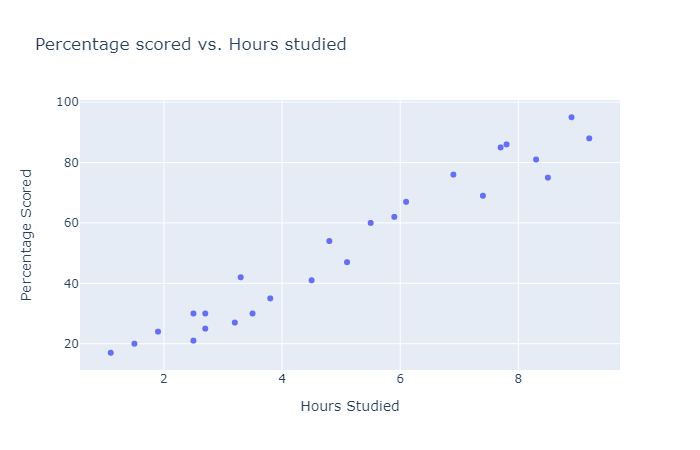

In [4]:
fig = px.scatter(x=student_scores['Hours'], y=student_scores['Scores'], title='Percentage scored vs. Hours studied',
                 labels={'x':'Hours Studied', 'y':'Percentage Scored'})
fig.show('png')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
hours = student_scores.iloc[:,:-1].values
scores = student_scores.iloc[:,-1].values

In [6]:
# 25 samples
np.shape(hours)

(25, 1)

In [7]:
# Label for each sample
np.shape(scores)

(25,)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(hours,scores,test_size=0.20,random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
model = LinearRegression().fit(train_X,train_Y)

**Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.**

**You can obtain the coefficient of determination (𝑅²) by this script:**

In [10]:
r_sq = model.score(train_X,train_Y)
print('coeffiecent of determination: ', r_sq)

coeffiecent of determination:  0.9515510725211552


## **Linear Regression Line**
**The estimated regression line has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥**

**The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁**

In [11]:
b1 = model.coef_
b0 = model.intercept_
linear_reg_eq = b1*hours + b0
print('Regression Line Points:\n',linear_reg_eq)

Regression Line Points:
 [[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


In [12]:
np.shape(linear_reg_eq)

(25, 1)

In [13]:
linear_reg_eq = linear_reg_eq.flatten()
np.shape(linear_reg_eq)

(25,)

Let's plot the data point we have and the linear regression line to find any relationship between the data. We can create the plot with the following script:

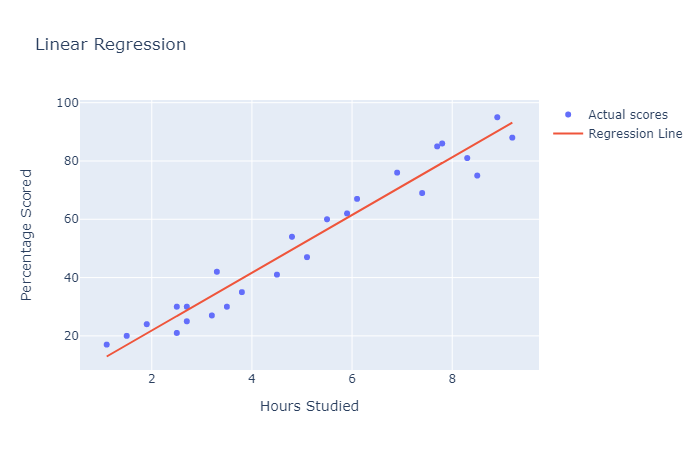

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=student_scores['Hours'], y=student_scores['Scores'], mode='markers',
                    name='Actual scores'))
fig.add_trace(go.Scatter(x=student_scores['Hours'], y=linear_reg_eq,mode='lines',
                    name='Regression Line'))
fig.update_layout(title='Linear Regression',xaxis_title='Hours Studied',yaxis_title='Percentage Scored')
fig.show("png")

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
y_pred = model.predict(test_X)

In [16]:
np.shape(y_pred)
np.shape(test_Y)

(5,)

**Comparing Actual vs Predicted Scores**

In [17]:
results = pd.DataFrame({'Actual Scores': test_Y, 'Predicted Score': y_pred})

In [18]:
results

,Actual Scores,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


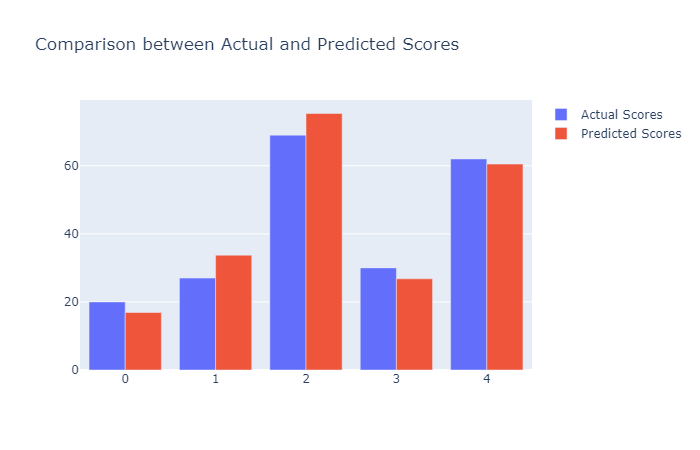

In [19]:
fig = go.Figure()
fig.add_trace(go.Bar(y=test_Y, name='Actual Scores'))
fig.add_trace(go.Bar(y=y_pred, name='Predicted Scores'))
fig.update_layout(title='Comparison between Actual and Predicted Scores')
fig.show("png")

**Testing with own data**

In [20]:
test_hour = 9.50
own_pred = model.predict([[test_hour]])
print("No of Hours = {}".format(test_hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.5
Predicted Score = 96.16939660753592


## **EVALUATE MODEL**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(test_Y, y_pred))

Mean Absolute Error: 4.183859899002975
